<a name = Section0></a>
<h1 style = "color : #79cc79"> Table of Content</h1>

-  [**Introduction**](#Section1)<br>
-  [**Problem Statement**](#Section2)<br>
-  [**Installing and Importing Libraries**](#Section3)<br>
-  [**Data Defination and Aquisition**](#Section4)<br>
-  [**Data Pre-Profiling**](#Section5)<br>
-  [**Data Pre Processing**](#Section6)<br>
-  [**Data Post-Profiliing**](#Section7)<br>
-  [**Exploratory Data Analysis**](#Section8)<br>
-  [**x,y split**](#Section9)<br>
-  [**TRain Test Split**](#Section1)<br>
-  [**Categorical and Continues Split**](#Section2)<br>
-  [**Scaling**](#Section3)<br>
-  [**Encoding**](#Section4)<br>
-  [**EDA 2**](#Section5)<br>
-  [**Modeling**](#Section6)<br>
-  [**Model Evaluation**](#Section7)<br>
-  [**Conclusion**](#Section9)<br>

##INTRODUCTION
A laptop, also known as a notebook computer, is a small, portable personal computer that is designed to be smaller and lighter than a desktop computer. Laptops are typically powered by a rechargeable battery and can be used away from a power source for a set period of time.
Here are some features of a laptop:
Design: Laptops usually have a clamshell design, with the screen on the inside of the upper lid and the keyboard on the inside of the lower lid. The screen hinges up to open.
Components: Laptops typically have a screen, keyboard, pointing device, speakers, microphone, and camera.
Operating system: Laptops usually run on desktop operating systems, which were originally developed for desktop computers.
Energy consumption: Laptops are generally lower in energy consumption than desktop computers.
Portability: Laptops are designed to be portable and easy to carry around.

##PROBLEM STATEMENT
LAPTOP PRICE PRIDICTION

Perform an exploratory data analysis (EDA) and Linear regression model on the provided "Laptop dataset" to extract meaningful insights about the trends, customer demographics, and laptop characteristics. The goal is to pridict price of laptop by analysin it's patterns, relationships, and features.

##IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a name = Section4></a>
<h1 style = "color : #79cc79"> Data Defination and Aquisition</h1>

 | Records | Features | Dataset Size |
          | :--: | :--: | :--: |
          | 1268  | 16 | 158.6kb  |


| ID | Feature                  | Description                       |
| :--| :------------------------| :---------------------------------|
| 1  | **Company:**                 |company of the laptop||||
| 2  | **Type name:**                | Type of the Laptop |  
| 3  | **Ram:**              | Ram of the laptop|  
| 4  | **Weight:**                 | Weight of laptop |
| 5  | **Price:**               |Price of laptop |
| 6  | **Touchscreen:**            |laptop is touchscreen or not              |  
| 7  | **IPS:**        |in-plane switching.|  
| 8 | **PPI:**           | pixel per inch.              |
| 9 | **CPU brand:**             |  Brand of CPU   
| 10 | **HDD:**             |  Hard disk drive
| 11  | **SSD:**                 |Solid state drive||||
| 12  | **Flash storage:**                | flash storage is present or not |  
| 13  | **GPU brand:**              | GPU brand of the laptop|  
| 14  | **os:**                 | Operating system of laptop |

In [ ]:
laptop_df = pd.read_csv('/content/laptop-price.csv')
laptop_df.head()

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


##DATA PRE-PROFILING

In [ ]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   object 
 2   TypeName       1268 non-null   object 
 3   Ram            1268 non-null   int64  
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   int64  
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   object 
 10  HDD            1268 non-null   int64  
 11  SSD            1268 non-null   int64  
 12  Hybrid         1268 non-null   int64  
 13  Flash_Storage  1268 non-null   int64  
 14  Gpu brand      1268 non-null   object 
 15  os             1268 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 158.6+ KB


In [ ]:
laptop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1268.0,652.887224,376.581012,0.000000,326.750000,652.500000,980.250000,1302.000000
Ram,1268.0,8.461356,5.569898,1.000000,4.000000,8.000000,8.000000,64.000000
Weight,1268.0,2.080047,0.806482,0.690000,1.500000,2.040000,2.320000,11.100000
Price,1268.0,59924.981175,37340.350650,9270.720000,31914.720000,52107.840000,79346.840400,324954.720000
Touchscreen,1268.0,0.145110,0.352351,0.000000,0.000000,0.000000,0.000000,1.000000
Ips,1268.0,0.282334,0.450313,0.000000,0.000000,0.000000,1.000000,1.000000
ppi,1268.0,145.935819,43.445969,44.019462,127.335675,141.211998,157.350512,352.465147
HDD,1268.0,415.741325,517.152677,0.000000,0.000000,0.000000,1000.000000,2000.000000
SSD,1268.0,183.634069,186.641125,0.000000,0.000000,256.000000,256.000000,1024.000000
Hybrid,1268.0,9.075710,93.825228,0.000000,0.000000,0.000000,0.000000,1000.000000


In [ ]:
laptop_df[laptop_df.duplicated()]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os


<Axes: >

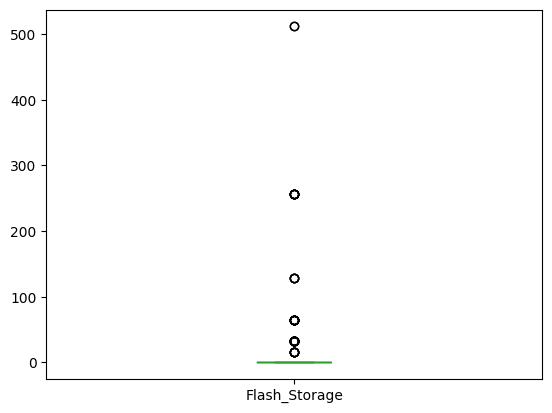

In [ ]:
laptop_df['Flash_Storage'].plot.box()

In [ ]:
laptop_df['Flash_Storage'].value_counts()

,count
Flash_Storage,
0,1196
32,36
64,15
256,8
16,7
128,4
512,2


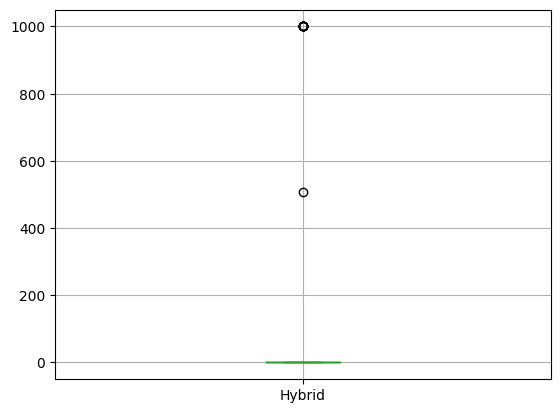

In [ ]:
laptop_df['Hybrid'].plot.box()
plt.grid()


In [ ]:
laptop_df[laptop_df['Hybrid']>500]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
145,151,Dell,Gaming,8,2.62,47898.7200,0,0,141.211998,Intel Core i7,0,0,1000,0,Nvidia,Windows
947,976,Lenovo,Notebook,4,1.70,53386.5600,0,0,111.935204,Intel Core i5,0,0,508,0,Intel,Windows
979,1010,Dell,Gaming,8,2.65,50562.7200,0,0,141.211998,Intel Core i5,0,0,1000,0,Nvidia,Windows
1049,1081,Lenovo,Gaming,32,4.60,172627.2000,0,1,127.335675,Intel Core i7,0,512,1000,0,Nvidia,Windows
1084,1116,Lenovo,Gaming,16,4.60,146519.4672,0,1,127.335675,Intel Core i7,0,256,1000,0,Nvidia,Windows
1103,1135,Lenovo,Notebook,16,2.50,58554.7200,0,0,141.211998,Intel Core i7,0,0,1000,0,AMD,Windows
1126,1158,Lenovo,Notebook,8,2.50,42010.7472,0,0,141.211998,Intel Core i5,0,0,1000,0,AMD,Windows
1144,1176,Lenovo,Notebook,4,2.32,43956.0000,0,0,141.211998,Intel Core i7,0,0,1000,0,Intel,Windows
1223,1258,Lenovo,Notebook,8,2.32,47685.6000,0,0,141.211998,Intel Core i7,0,0,1000,0,AMD,Windows
1231,1266,HP,Notebook,6,2.04,29303.4672,0,0,141.211998,AMD Processor,0,0,1000,0,AMD,Windows


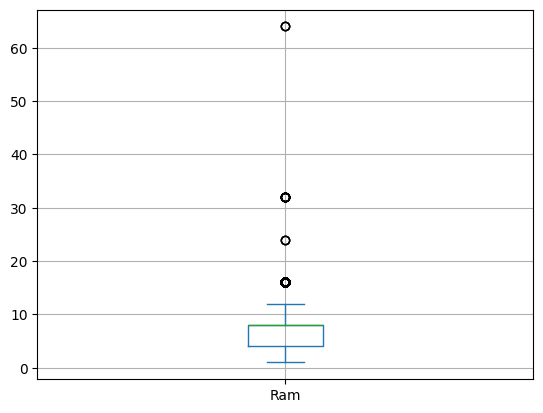

In [ ]:
laptop_df['Ram'].plot.box()
plt.grid()

In [ ]:
laptop_df[laptop_df['Ram']>60]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
68,71,Dell,Ultrabook,64,1.40,50882.4000,0,1,165.632118,Intel Core i7,0,256,0,0,AMD,Windows
699,720,Lenovo,Ultrabook,64,1.17,89864.1792,0,1,209.800683,Intel Core i7,0,512,0,0,Intel,Windows
1034,1066,Asus,Gaming,64,3.58,211788.0000,0,1,127.335675,Intel Core i7,0,1000,0,0,Nvidia,Windows


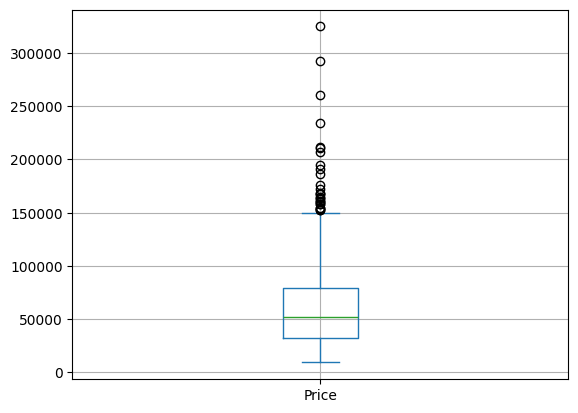

In [ ]:
laptop_df['Price'].plot.box()
plt.grid()

In [ ]:
laptop_df[laptop_df['Price']>300000]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
189,196,Razer,Gaming,32,3.49,324954.72,1,0,254.671349,Intel Core i7,0,1000,0,0,Nvidia,Windows


##EDA

In [ ]:
laptop_df.columns

Index(['index', 'Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'ppi', 'Cpu brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Gpu brand', 'os'],
      dtype='object')

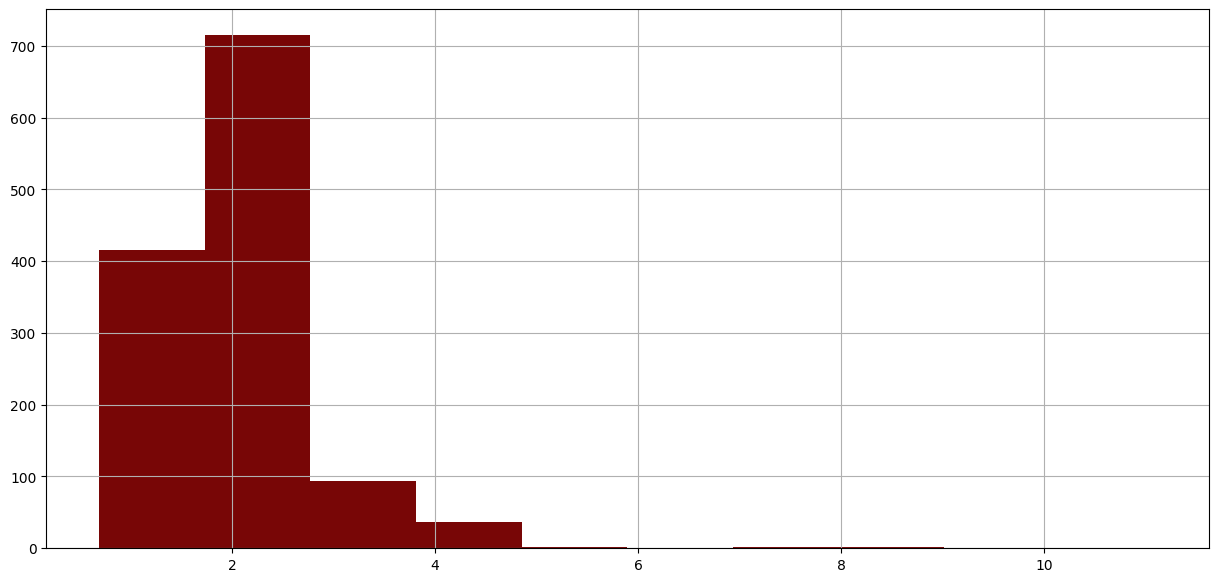

In [ ]:
plt.figure(figsize  = (15,7))
plt.hist(laptop_df['Weight'] ,color='#780606')
plt.grid()

In [ ]:
laptop_df.loc[laptop_df['Weight'] > 4, 'Weight'] = laptop_df['Weight'].median()

In [ ]:
laptop_df[laptop_df['Weight'] > 4]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os


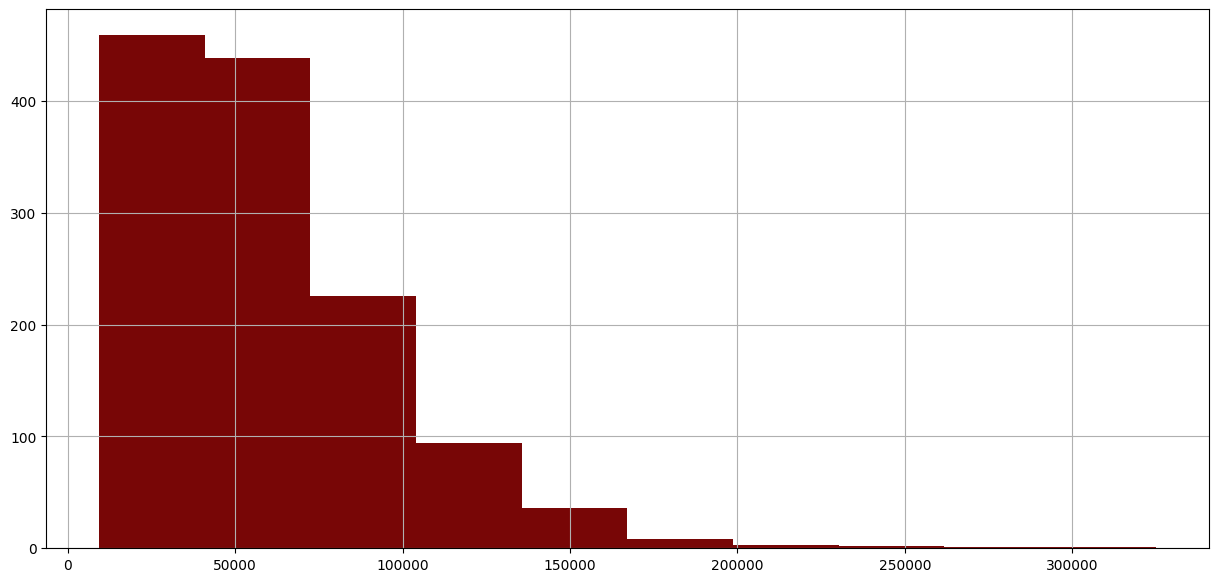

In [ ]:
plt.figure(figsize  = (15,7))
plt.hist(laptop_df['Price'] ,color='#780606')
plt.grid()

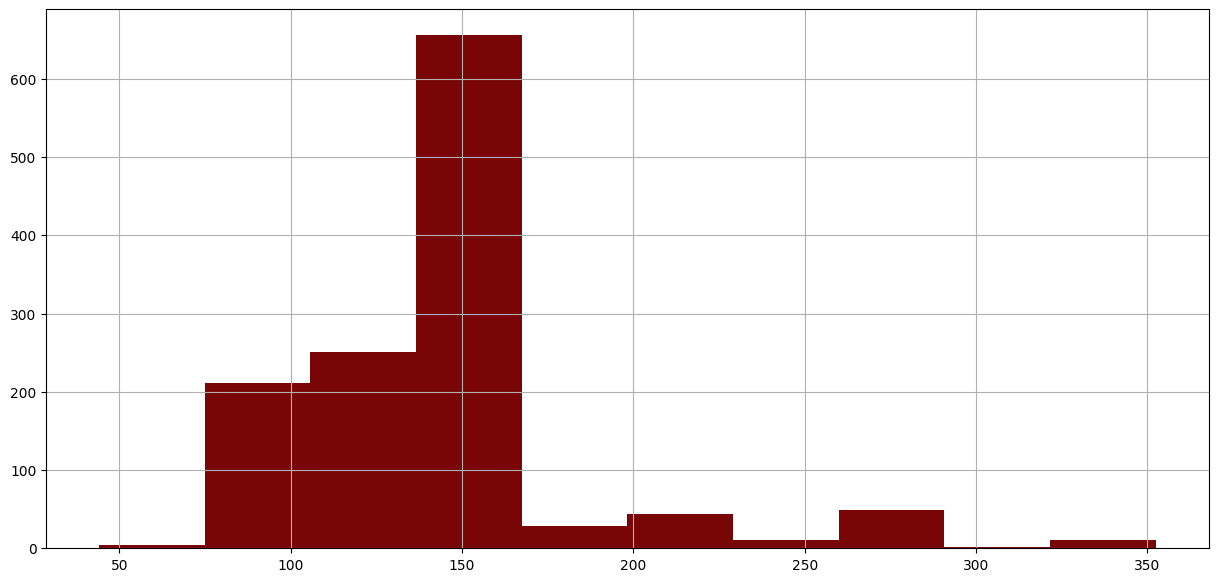

In [ ]:
plt.figure(figsize  = (15,7))
plt.hist(laptop_df['ppi'] ,color='#780606')
plt.grid()

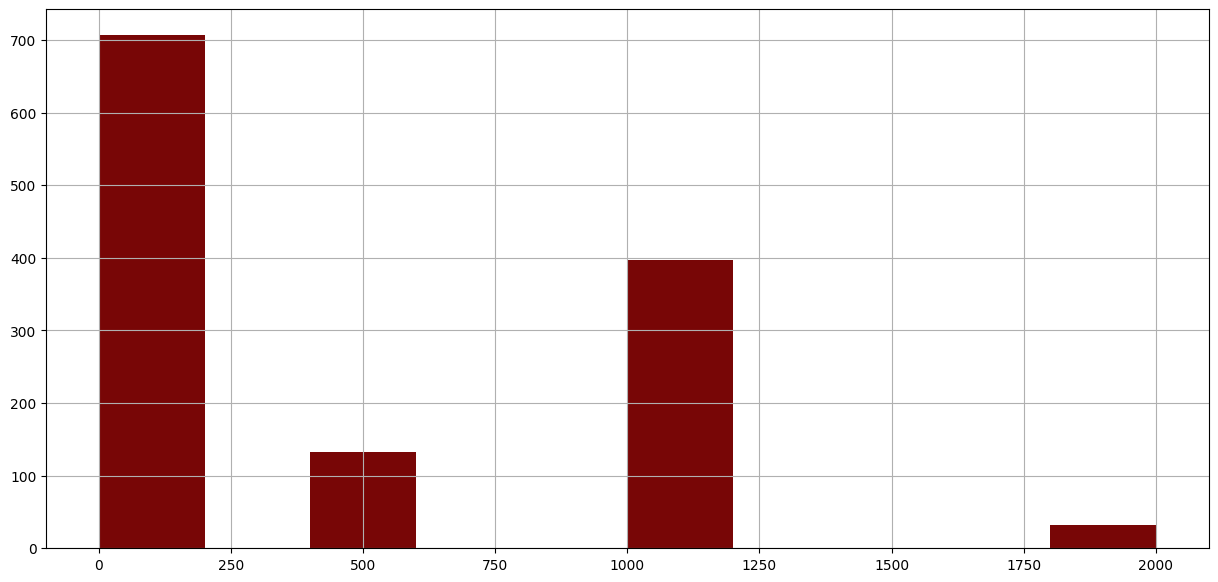

In [ ]:
plt.figure(figsize  = (15,7))
plt.hist(laptop_df['HDD'] ,color='#780606')
plt.grid()

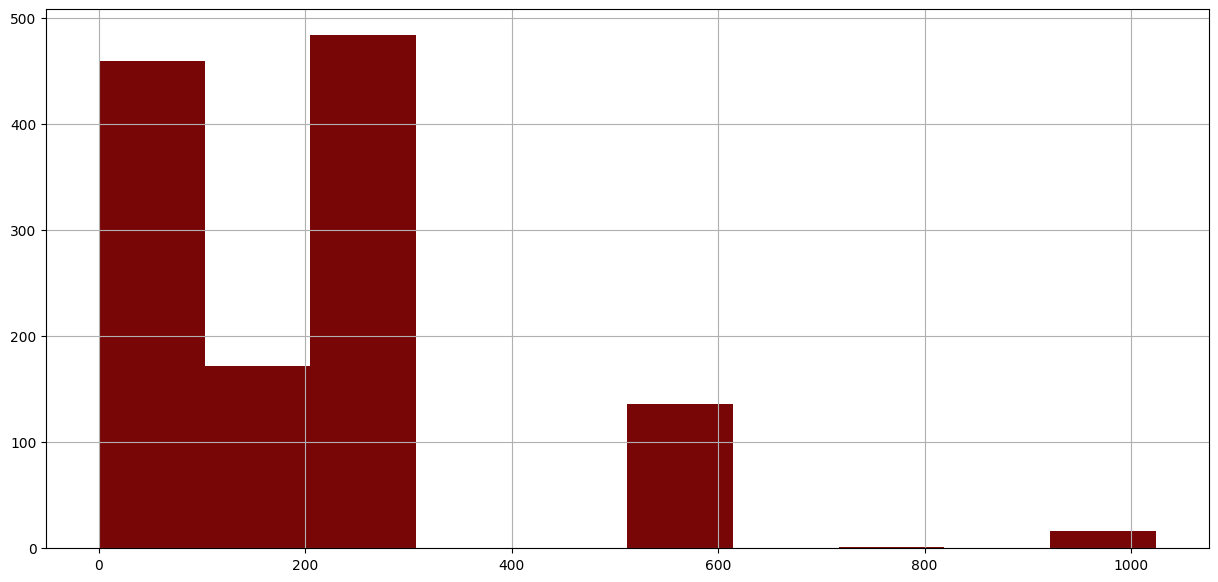

In [ ]:
plt.figure(figsize  = (15,7))
plt.hist(laptop_df['SSD'] ,color='#780606')
plt.grid()

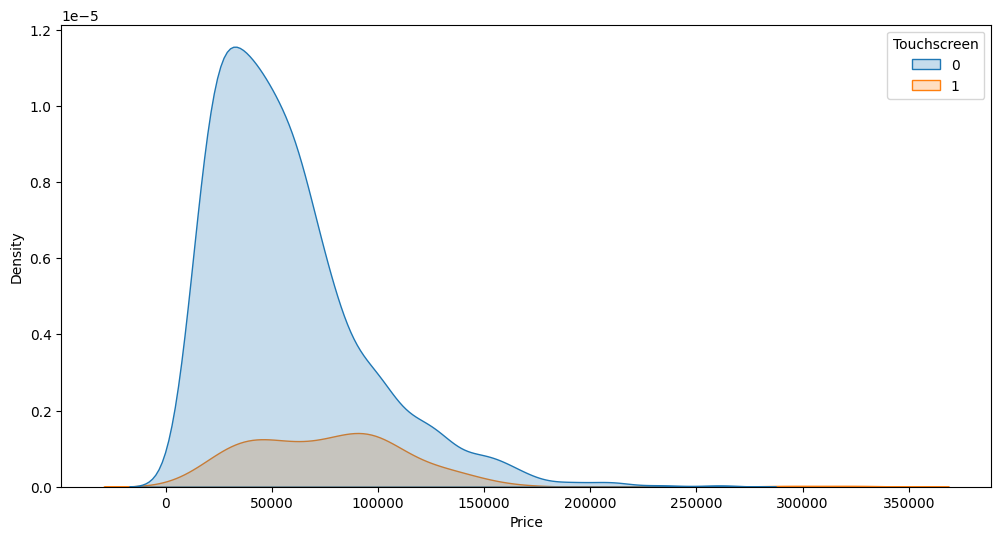

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=laptop_df, x='Price',hue='Touchscreen',fill=True)
plt.show()

In [ ]:
laptop_df['Weight'].median()

2.04

In [ ]:
laptop_df.columns

Index(['index', 'Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'ppi', 'Cpu brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Gpu brand', 'os'],
      dtype='object')

<ipython-input-100-beacd85a3635>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cpu brand',y='Price',data=laptop_df,palette='rainbow')


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000'),
  Text(0, 300000.0, '300000'),
  Text(0, 350000.0, '350000')])

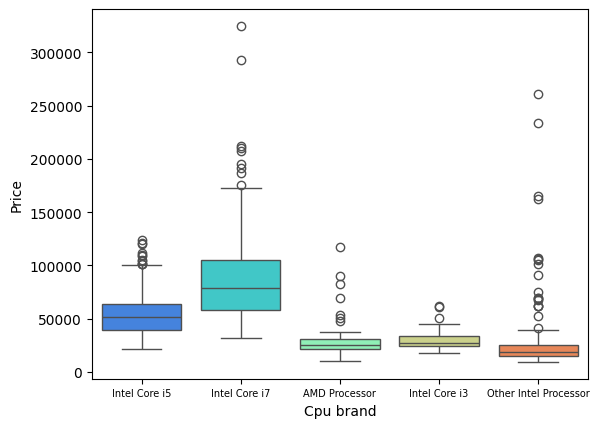

In [ ]:
sns.boxplot(x='Cpu brand',y='Price',data=laptop_df,palette='rainbow')
plt.xticks(size=7)
plt.yticks(size=10)

<ipython-input-101-e22d78d1a13e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TypeName',y='Price',data=laptop_df,palette='rainbow')


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000'),
  Text(0, 300000.0, '300000'),
  Text(0, 350000.0, '350000')])

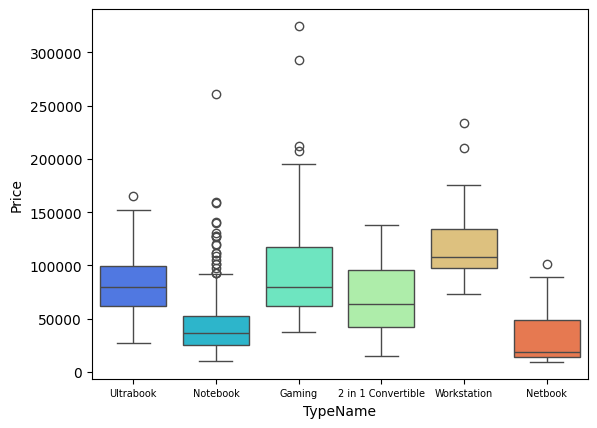

In [ ]:
sns.boxplot(x='TypeName',y='Price',data=laptop_df,palette='rainbow')
plt.xticks(size=7)
plt.yticks(size=10)

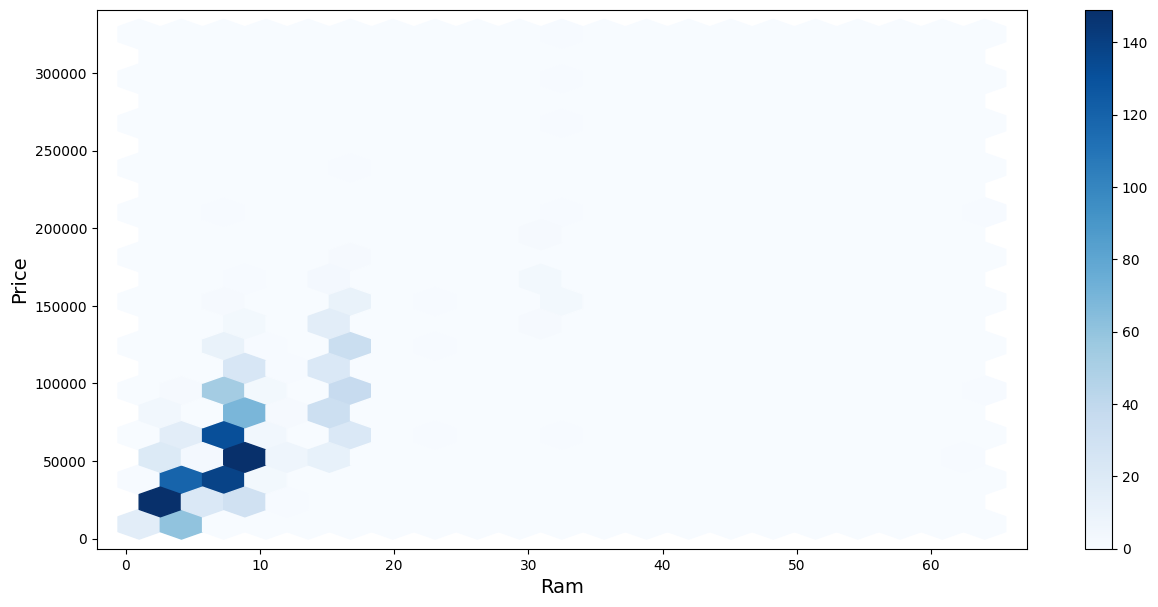

In [ ]:
laptop_df.plot.hexbin(x='Ram', y='Price', gridsize=20, sharex=False , figsize = (15,7), cmap='Blues')
plt.xlabel(xlabel='Ram', size=14)
plt.ylabel(ylabel='Price', size=14)
plt.show()


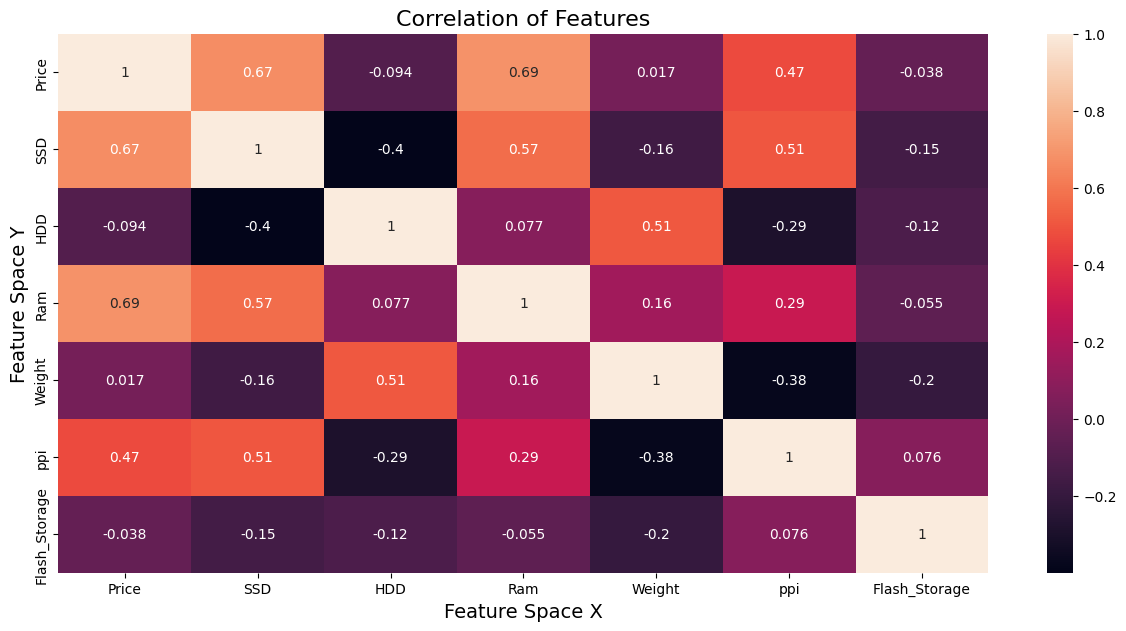

In [ ]:
df1 = laptop_df[['Price','SSD','HDD','Ram','Weight','ppi','Flash_Storage']]
corr_matrix = df1.corr()

plt.figure(figsize = (15,7))
corr_matrix = df1.corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

9 Splitting Dataset into Dependent variable and Independent variabl

In [ ]:
#Now will split our dataset into Dependent variable and Independent variable
y = laptop_df['Price']
X = laptop_df.drop(columns='Price')

In [ ]:
X.shape

(1268, 15)

In [ ]:
X.head()

,index,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [ ]:
X.drop(['index','Company'], axis = 1, inplace = True)

In [ ]:
X.head()

,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [ ]:
X.drop('Ips', axis = 1, inplace = True)

In [ ]:
X.drop('Flash_Storage', axis = 1, inplace = True)

# 8 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state = 42)


print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (1014, 11)
Shape of X_test = (254, 11)
Shape of y_train = (1014,)
Shape of y_test = (254,)


categorical & continues split

In [ ]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cont = X_train.select_dtypes(exclude=['object'])

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cont = X_test.select_dtypes(exclude=['object'])

In [ ]:
X_train_cat

,TypeName,Cpu brand,Gpu brand,os
32,Ultrabook,Intel Core i7,Intel,Windows
156,Notebook,Intel Core i5,AMD,Windows
723,Notebook,Other Intel Processor,Intel,Others/No OS/Linux
964,Notebook,Intel Core i5,Intel,Windows
277,Ultrabook,Intel Core i5,Nvidia,Windows
...,...,...,...,...
1044,Notebook,Intel Core i5,Nvidia,Windows
1095,Ultrabook,Intel Core i5,Intel,Windows
1130,Gaming,Intel Core i7,Nvidia,Windows
860,Notebook,Intel Core i3,AMD,Others/No OS/Linux


In [ ]:
X_train_cont

,Ram,Weight,Touchscreen,ppi,HDD,SSD,Hybrid
32,16,1.20,1,276.053530,0,512,0
156,8,2.13,0,141.211998,0,256,0
723,2,1.68,0,111.935204,0,0,0
964,8,1.40,0,276.053530,0,256,0
277,8,1.70,0,141.211998,0,256,0
...,...,...,...,...,...,...,...
1044,4,2.30,0,141.211998,1000,0,0
1095,8,1.26,0,125.367428,0,256,0
1130,8,2.62,0,141.211998,1000,0,0
860,4,2.18,0,100.454670,1000,0,0


#encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

drop_enc = OneHotEncoder(drop='first', sparse_output = False)
drop_enc.fit(X_train_cat)

OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
drop_enc.categories_

[array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
        'Workstation'], dtype=object),
 array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
        'Other Intel Processor'], dtype=object),
 array(['AMD', 'Intel', 'Nvidia'], dtype=object),
 array(['Mac', 'Others/No OS/Linux', 'Windows'], dtype=object)]

In [ ]:
drop_enc.get_feature_names_out(X_train_cat.columns)

array(['TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation',
       'Cpu brand_Intel Core i3', 'Cpu brand_Intel Core i5',
       'Cpu brand_Intel Core i7', 'Cpu brand_Other Intel Processor',
       'Gpu brand_Intel', 'Gpu brand_Nvidia', 'os_Others/No OS/Linux',
       'os_Windows'], dtype=object)

In [ ]:
X_train_OHE = drop_enc.transform(X_train_cat)
X_test_OHE = drop_enc.transform(X_test_cat)

In [ ]:
X_train_OHE

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [ ]:
X_train_OHE_DF = pd.DataFrame(X_train_OHE, columns = drop_enc.get_feature_names_out(X_train_cat.columns), index = X_train_cat.index)
X_test_OHE_DF = pd.DataFrame(X_test_OHE, columns = drop_enc.get_feature_names_out(X_train_cat.columns), index = X_test_cat.index)

In [ ]:
X_train_OHE_DF

,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
156,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
723,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
964,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
277,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1095,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
860,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#Scaling

In [ ]:
X_train_cont['Ram'] = np.log(X_train_cont['Ram'])
X_train_cont['Weight'] = np.log(X_train_cont['Weight'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_cont)

StandardScaler()

In [ ]:
X_train_S = scaler.transform(X_train_cont)
X_test_S = scaler.transform(X_test_cont)

In [ ]:
X_train_S_DF = pd.DataFrame(X_train_S, columns = (X_train_cont.columns + '_S'), index = X_train_cont.index)
X_test_S_DF = pd.DataFrame(X_test_S, columns = (X_train_cont.columns + '_S'), index = X_test_cont.index)

In [ ]:
X_train_S_DF

,Ram_S,Weight_S,Touchscreen_S,ppi_S,HDD_S,SSD_S,Hybrid_S
32,1.474153,-1.577943,2.400000,2.937800,-0.789643,1.803306,-0.09338
156,0.175461,0.403717,-0.416667,-0.136212,-0.789643,0.397268,-0.09338
723,-2.421925,-0.415912,-0.416667,-0.803641,-0.789643,-1.008770,-0.09338
964,0.175461,-1.045573,-0.416667,2.937800,-0.789643,0.397268,-0.09338
277,0.175461,-0.375041,-0.416667,-0.136212,-0.789643,0.397268,-0.09338
...,...,...,...,...,...,...,...
1044,-1.123232,0.668907,-0.416667,-0.136212,1.150691,-1.008770,-0.09338
1095,0.175461,-1.409443,-0.416667,-0.497424,-0.789643,0.397268,-0.09338
1130,0.175461,1.118787,-0.416667,-0.136212,1.150691,-1.008770,-0.09338
860,-1.123232,0.483850,-0.416667,-1.065365,1.150691,-1.008770,-0.09338


#Concatination

In [ ]:
#combining cat and cont data in train and test respectively

X_train_comb = pd.concat([X_train_OHE_DF,X_train_S_DF],axis = 1)
X_test_comb = pd.concat([X_test_OHE_DF,X_test_S_DF],axis = 1)

In [ ]:
X_train_comb

,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows,Ram_S,Weight_S,Touchscreen_S,ppi_S,HDD_S,SSD_S,Hybrid_S
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.474153,-1.577943,2.400000,2.937800,-0.789643,1.803306,-0.09338
156,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.175461,0.403717,-0.416667,-0.136212,-0.789643,0.397268,-0.09338
723,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-2.421925,-0.415912,-0.416667,-0.803641,-0.789643,-1.008770,-0.09338
964,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.175461,-1.045573,-0.416667,2.937800,-0.789643,0.397268,-0.09338
277,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.175461,-0.375041,-0.416667,-0.136212,-0.789643,0.397268,-0.09338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.123232,0.668907,-0.416667,-0.136212,1.150691,-1.008770,-0.09338
1095,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.175461,-1.409443,-0.416667,-0.497424,-0.789643,0.397268,-0.09338
1130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.175461,1.118787,-0.416667,-0.136212,1.150691,-1.008770,-0.09338
860,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.123232,0.483850,-0.416667,-1.065365,1.150691,-1.008770,-0.09338


Checking Assumptions

Normalty

<ipython-input-129-34f1dc3e7a15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='Price', ylabel='Density'>

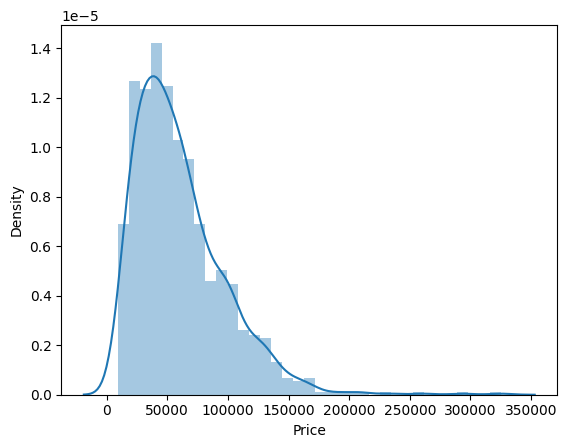

In [ ]:
sns.distplot(y_train)

<ipython-input-130-0db0a01d2ca3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(y_train))


<Axes: xlabel='Price', ylabel='Density'>

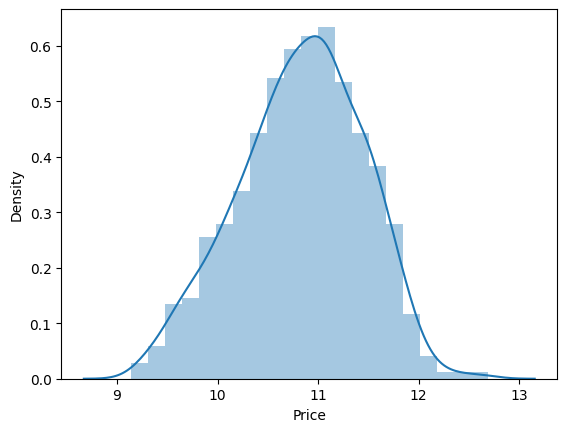

In [ ]:
sns.distplot(np.log(y_train))

In [ ]:
tv_train = np.log(y_train)
tv_test = np.log(y_test)

#MULTI-COLLINEARITY

In [ ]:
X_train_comb

,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows,Ram_S,Weight_S,Touchscreen_S,ppi_S,HDD_S,SSD_S,Hybrid_S
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.474153,-1.577943,2.400000,2.937800,-0.789643,1.803306,-0.09338
156,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.175461,0.403717,-0.416667,-0.136212,-0.789643,0.397268,-0.09338
723,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-2.421925,-0.415912,-0.416667,-0.803641,-0.789643,-1.008770,-0.09338
964,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.175461,-1.045573,-0.416667,2.937800,-0.789643,0.397268,-0.09338
277,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.175461,-0.375041,-0.416667,-0.136212,-0.789643,0.397268,-0.09338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.123232,0.668907,-0.416667,-0.136212,1.150691,-1.008770,-0.09338
1095,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.175461,-1.409443,-0.416667,-0.497424,-0.789643,0.397268,-0.09338
1130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.175461,1.118787,-0.416667,-0.136212,1.150691,-1.008770,-0.09338
860,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.123232,0.483850,-0.416667,-1.065365,1.150691,-1.008770,-0.09338


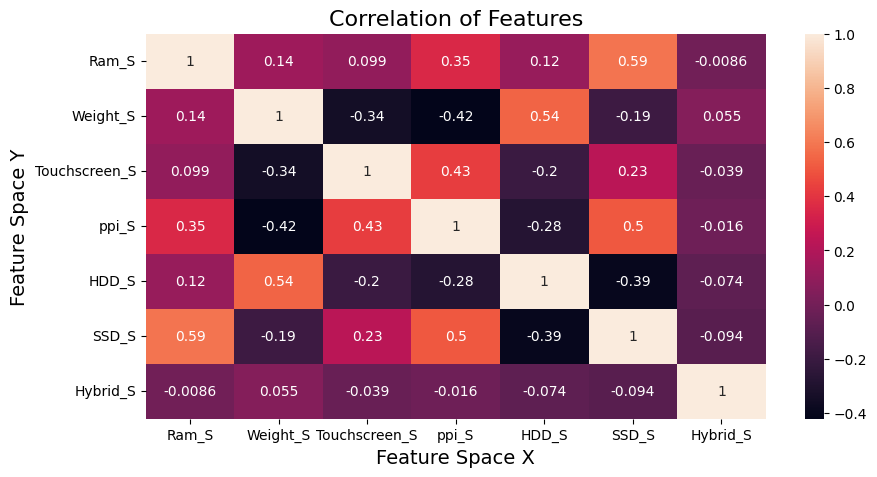

In [ ]:
df2 = X_train_comb[['Ram_S','Weight_S','Touchscreen_S','ppi_S','HDD_S','SSD_S','Hybrid_S']]
corr_matrix = df2.corr()

plt.figure(figsize = (10,5))
corr_matrix = df2.corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

#LINEARITY

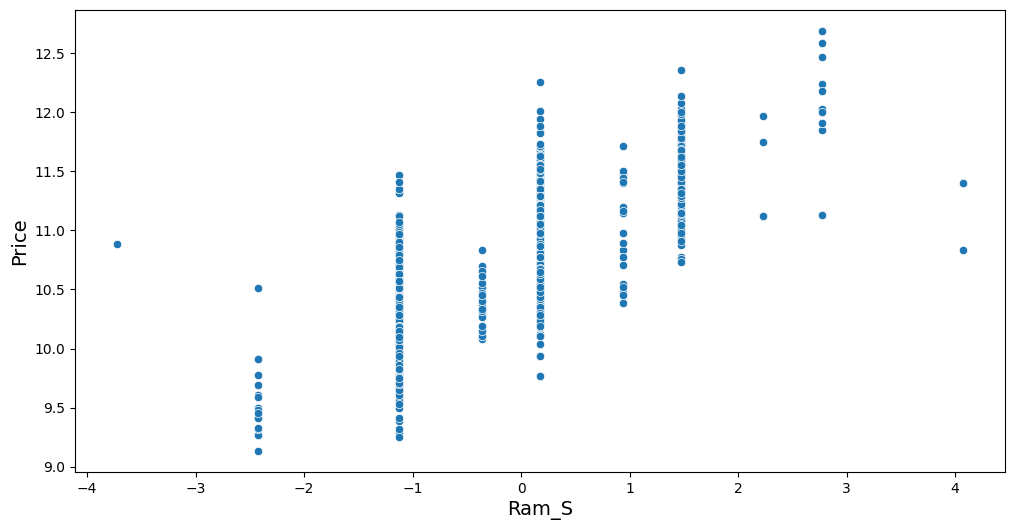

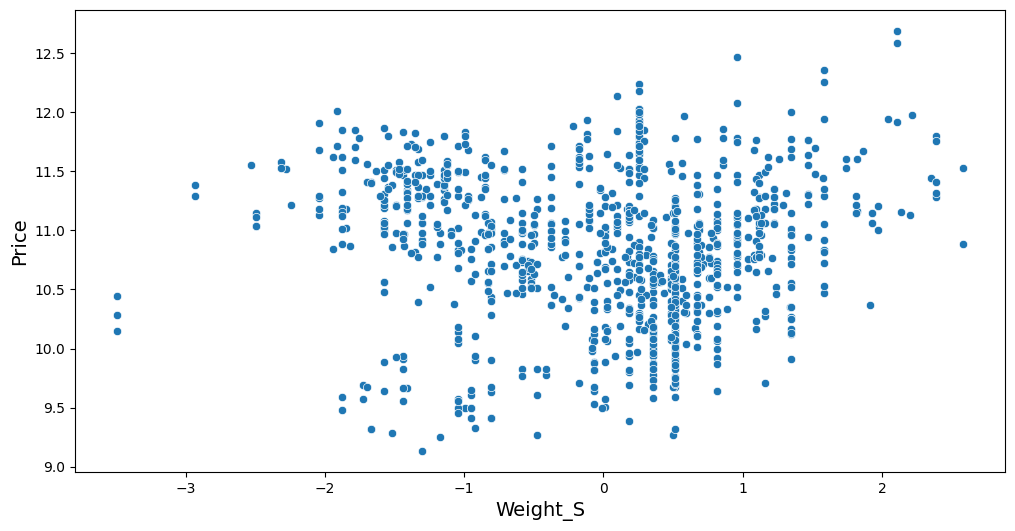

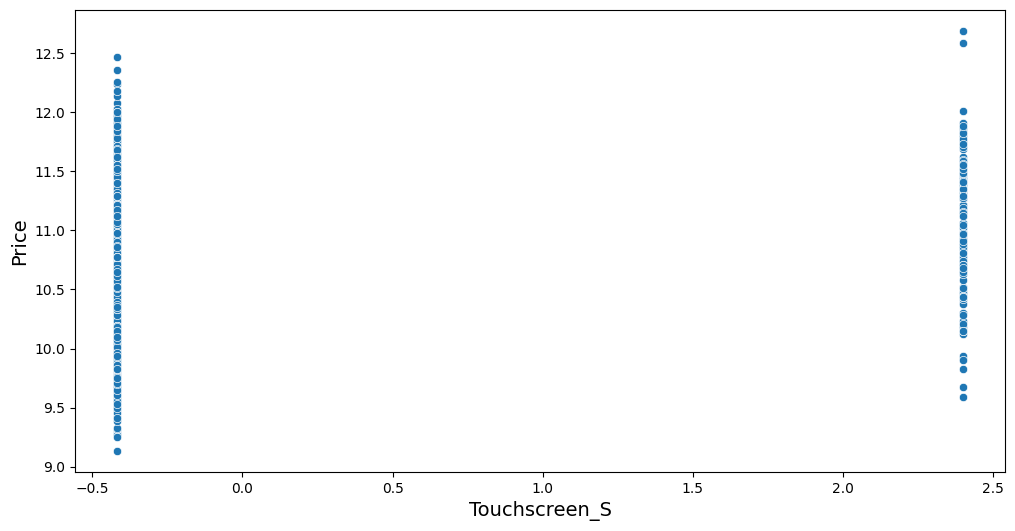

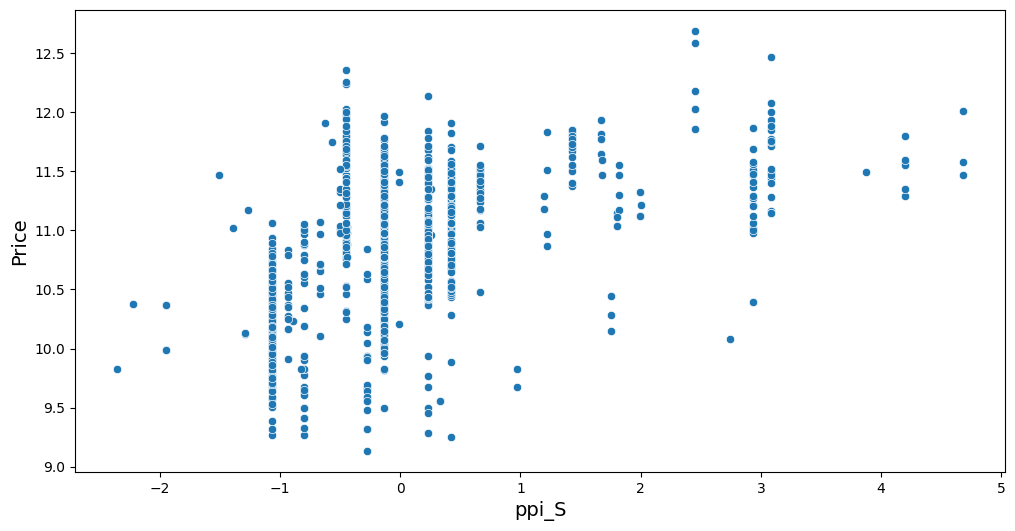

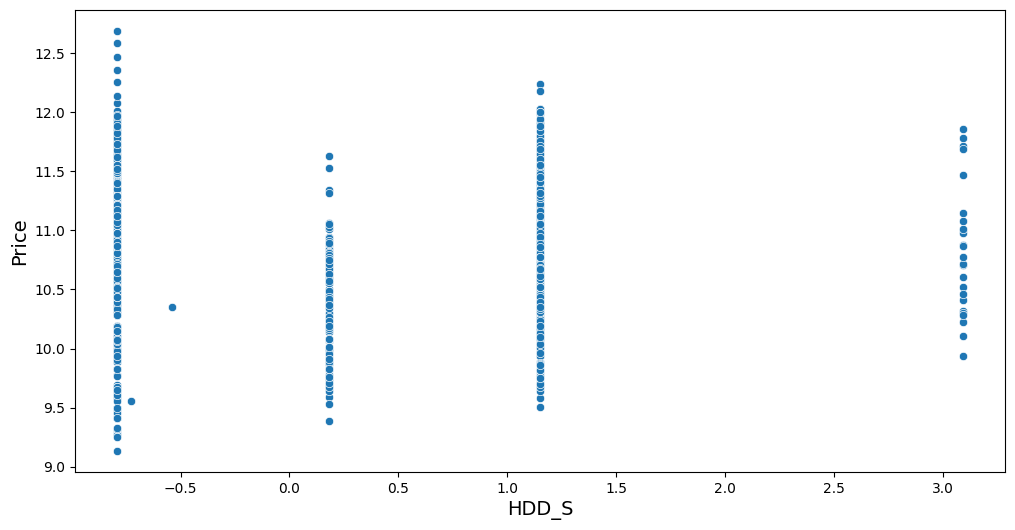

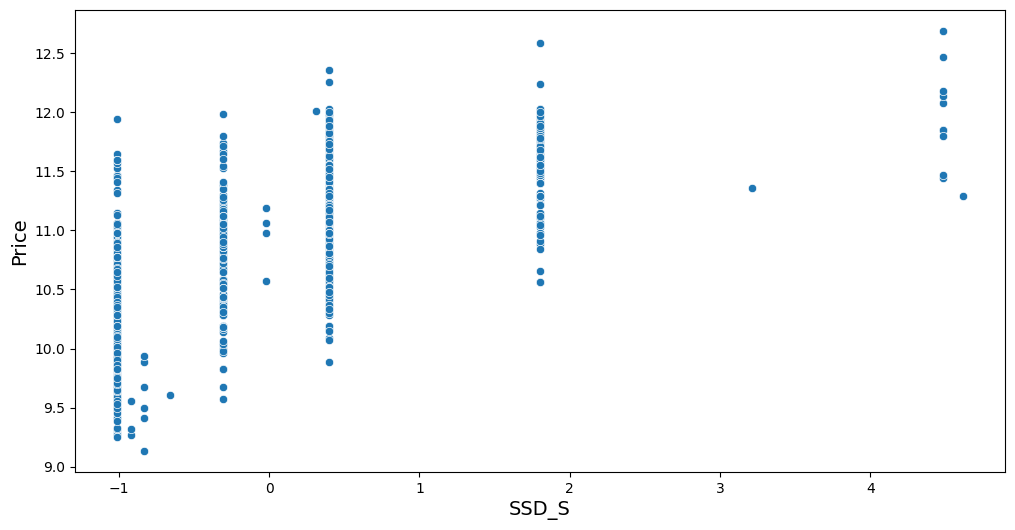

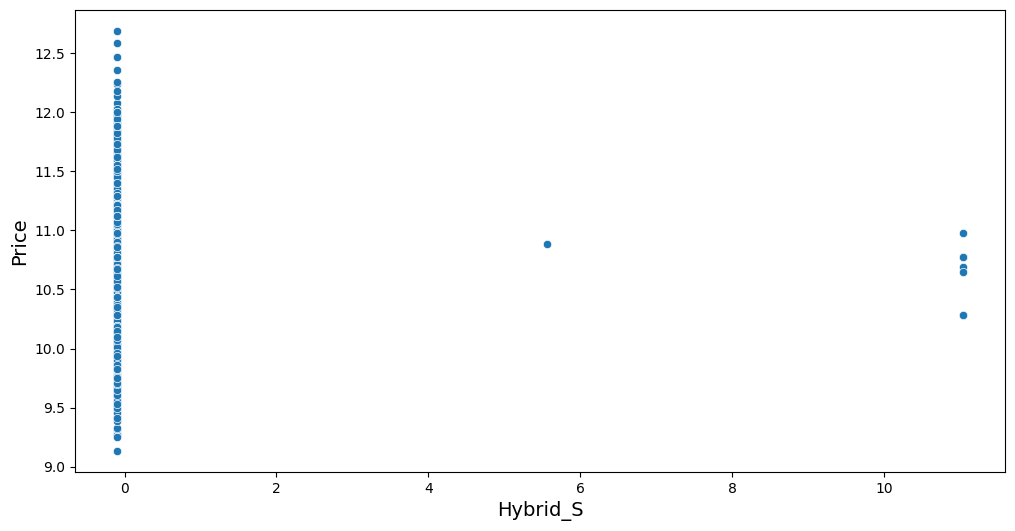

In [ ]:
cols = df2.columns

for col in cols:
  plt.figure(figsize=(12, 6))
  sns.scatterplot(x=df2[col], y=tv_train)
  plt.xlabel(xlabel=col, size=14)
  plt.ylabel(ylabel='Price', size=14)
  plt.show()

# ML Modeliing

In [ ]:
X_train_comb.shape

(1014, 20)

In [ ]:
X_train_comb.isnull().sum()

,0
TypeName_Gaming,0
TypeName_Netbook,0
TypeName_Notebook,0
TypeName_Ultrabook,0
TypeName_Workstation,0
Cpu brand_Intel Core i3,0
Cpu brand_Intel Core i5,0
Cpu brand_Intel Core i7,0
Cpu brand_Other Intel Processor,0
Gpu brand_Intel,0


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_comb,tv_train)

#Print out the coefficients of the model
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

Coefficients: 
 [ 2.07489113e-01 -7.82649724e-02 -8.30902449e-02  9.22561765e-02
  6.55893937e-01  1.40738689e-01  4.14298526e-01  4.53294552e-01
 -1.55166006e-01  7.24243891e-02  7.54004405e-02 -4.23127392e-01
 -1.95551174e-01  1.66787447e-01 -5.01824677e-02 -1.78858655e-04
  7.49676626e-02  2.65455440e-02  1.24652098e-01  9.32181373e-03]
Intercept: 
 10.648753816874146


In [ ]:
print('Intercept: \n', lm.intercept_)
pd.Series(data = lm.coef_, index = X_train_comb.columns)

Intercept: 
 10.648753816874146


,0
TypeName_Gaming,0.207489
TypeName_Netbook,-0.078265
TypeName_Notebook,-0.083090
TypeName_Ultrabook,0.092256
TypeName_Workstation,0.655894
Cpu brand_Intel Core i3,0.140739
Cpu brand_Intel Core i5,0.414299
Cpu brand_Intel Core i7,0.453295
Cpu brand_Other Intel Processor,-0.155166
Gpu brand_Intel,0.072424


In [ ]:
S2 = pd.Series(index = (X_train_comb.columns), data = lm.coef_)
S1 = pd.Series(index = ['intercept'], data = lm.intercept_)

pd.concat([S1,S2])

,0
intercept,10.648754
TypeName_Gaming,0.207489
TypeName_Netbook,-0.078265
TypeName_Notebook,-0.083090
TypeName_Ultrabook,0.092256
TypeName_Workstation,0.655894
Cpu brand_Intel Core i3,0.140739
Cpu brand_Intel Core i5,0.414299
Cpu brand_Intel Core i7,0.453295
Cpu brand_Other Intel Processor,-0.155166


In [ ]:
TV_train_predict = lm.predict(X_train_comb)
TV_test_predict = lm.predict(X_test_comb)

In [ ]:
y_train_pred = np.exp(TV_train_predict)
y_test_pred = np.exp(TV_test_predict)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Test results')
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Test results
MSE: 1.383817506410122e+24
RMSE: 1176357728928.6292
